In [50]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
def pre_process(org_house_df):
    
    house_df = pd.DataFrame()
    
    org_house_df = org_house_df.fillna({'MSZoning' : 'RL'}) 
    house_df['MSZoning']= org_house_df['MSZoning'].map({'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}).astype(int)
    house_df['LandContour']= org_house_df['LandContour'].map({'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}).astype(int)
    house_df['Condition1']= org_house_df['Condition1'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNe': 7,
         'RRNn': 8}).astype(int)
    house_df['Condition2']= org_house_df['Condition2'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNn': 7}).astype(int)
    house_df['Neighborhood']= org_house_df['Neighborhood'].map({'Blmngtn': 0,
         'Blueste': 1,
         'BrDale': 2,
         'BrkSide': 3,
         'ClearCr': 4,
         'CollgCr': 5,
         'Crawfor': 6,
         'Edwards': 7,
         'Gilbert': 8,
         'IDOTRR': 9,
         'MeadowV': 10,
         'Mitchel': 11,
         'NAmes': 12,
         'NPkVill': 13,
         'NWAmes': 14,
         'NoRidge': 15,
         'NridgHt': 16,
         'OldTown': 17,
         'SWISU': 18,
         'Sawyer': 19,
         'SawyerW': 20,
         'Somerst': 21,
         'StoneBr': 22,
         'Timber': 23,
         'Veenker': 24}).astype(int)
    house_df['BldgType']= org_house_df['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}).astype(int)
    
    house_df['1stFlrSF'] = org_house_df['1stFlrSF']
    house_df['2ndFlrSF'] = org_house_df['2ndFlrSF']
    
    org_house_df = org_house_df.fillna({'TotalBsmtSF' : 991}) 
    house_df['TotalBsmtSF'] = org_house_df['TotalBsmtSF']
    
    house_df['FlrSF'] = org_house_df['1stFlrSF'] + org_house_df['2ndFlrSF']
    house_df['TotalSF'] = house_df['TotalBsmtSF'] + house_df['FlrSF']
    
    house_df['GrLivArea'] = org_house_df['GrLivArea']
    
    house_df['HeatingQC']= org_house_df['HeatingQC'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    house_df['BedroomAbvGr']= org_house_df['BedroomAbvGr']
    
    org_house_df = org_house_df.fillna({'KitchenQual' : 'TA'}) 
    house_df['KitchenQual']= org_house_df['KitchenQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}).astype(int)
    
    house_df['TotRmsAbvGrd']= org_house_df['TotRmsAbvGrd']
    house_df['Fireplaces']= org_house_df['Fireplaces']
    
    org_house_df = org_house_df.fillna({'FireplaceQu' : 'Gd'}) 
    house_df['FireplaceQu']=org_house_df['FireplaceQu'].map({ 'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageType' : 'Attchd'}) 
    house_df['GarageType']=org_house_df['GarageType'].map({'2Types': 0,
         'Attchd': 1,
         'Basment': 2,
         'BuiltIn': 3,
         'CarPort': 4,
         'Detchd': 5}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageCars' : 2}) 
    house_df['GarageCars']= org_house_df['GarageCars']
    
    org_house_df = org_house_df.fillna({'GarageQual' : 'TA'}) 
    house_df['GarageQual']=org_house_df['GarageQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageCond' : 'TA'}) 
    house_df['GarageCond']=org_house_df['GarageCond'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    house_df['OverallCond']=org_house_df['OverallCond']
    house_df['OverallQual']=org_house_df['OverallQual']
    
    house_df['HouseAge'] = org_house_df['YrSold'] - org_house_df['YearRemodAdd']
    #house_df['GarageAge'] = org_house_df['YrSold'] - org_house_df['GarageYrBlt']
    house_df['IsRebuild'] = org_house_df['YearRemodAdd'] - org_house_df['YearBuilt']
    house_df['IsRebuild'].loc[house_df['IsRebuild']>0] = 1 
    
    return house_df
 

In [92]:
org_house_df = pd.read_csv('train.csv')

In [93]:
house_df = pre_process(org_house_df)
house_df['SalePrice'] = org_house_df['SalePrice']

In [94]:
house_df = house_df.drop(house_df[(house_df['TotalSF']>5) & (house_df['SalePrice']<12.5)].index)
house_df = house_df.drop(house_df[(house_df['GrLivArea']>5) & (house_df['SalePrice']<13)].index)

In [95]:
t = house_df['SalePrice'].values
house_df = house_df.drop(['SalePrice'], axis=1)
x = house_df.values

In [96]:
x.shape

(1460, 26)

In [97]:
t = t.astype('f')
x = x.astype('f')

In [98]:
t = t.reshape(len(t), 1)

In [99]:
dataset = list(zip(x, t))

In [100]:
import chainer
import chainer.functions as F
import chainer.links as L
import chainer
import cupy

from chainer import training
from chainer.training import extensions
from chainer.optimizer import WeightDecay

In [101]:
n_train = int(len(dataset)*0.7)

In [102]:
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=0)

In [103]:
class NN(chainer.Chain):
    def __init__(self, n_out=1):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, 20)
            self.fc2 = L.Linear(None, 20)
            self.fc3 = L.Linear(None, 10)
            self.fc4 = L.Linear(None, n_out)
            
            self.bn = L.BatchNormalization(26)
        
    def __call__(self, x):
        h = self.bn(x)
        h = self.fc1(h)
        h = F.relu(h)
        h = self.fc2(h)
        h = F.relu(h)
        h = self.fc3(h)
        h = F.relu(h)
        h = self.fc4(h)

        return h

In [104]:
np.random.seed(0)
nn = NN()
model = L.Classifier(nn, lossfun=F.mean_squared_error)
model.compute_accuracy = False
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
batch_size = 16

In [105]:
train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle=False)

In [106]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

In [107]:
epoch = 200

In [108]:
trainer = training.Trainer(updater, (epoch, "epoch"), out="result/house_price")

trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, "epoch")))
trainer.extend(extensions.PrintReport(["epoch", "main/loss", "validation/main/loss"]))

In [109]:
trainer.run()

epoch       main/loss   validation/main/loss
1           4.01378e+10  3.6502e+10            
2           4.0216e+10  3.64816e+10           
3           4.01438e+10  3.63193e+10           
4           3.96771e+10  3.55649e+10           
5           3.78208e+10  3.2773e+10            
6           3.3052e+10  2.60284e+10           
7           2.35091e+10  1.50482e+10           
8           1.14367e+10  5.05875e+09           
9           4.39784e+09  2.60182e+09           
10          2.95876e+09  1.75241e+09           
11          2.54485e+09  1.7667e+09            
12          2.57733e+09  1.60231e+09           
13          2.24117e+09  1.52673e+09           
14          2.19233e+09  1.50254e+09           
15          2.15475e+09  1.50608e+09           
16          2.09094e+09  1.38205e+09           
17          2.127e+09   1.40226e+09           
18          2.12759e+09  1.40476e+09           
19          2.03103e+09  1.39412e+09           
20          2.03478e+09  1.31697e+09          

162         1.52136e+09  8.43681e+08           
163         1.44987e+09  7.84462e+08           
164         1.4866e+09  8.34202e+08           
165         1.50602e+09  8.30816e+08           
166         1.5057e+09  8.53757e+08           
167         1.50791e+09  7.71965e+08           
168         1.61993e+09  7.93079e+08           
169         1.44848e+09  8.00386e+08           
170         1.5233e+09  8.12267e+08           
171         1.55015e+09  7.83114e+08           
172         1.39547e+09  7.67447e+08           
173         1.60812e+09  7.86626e+08           
174         1.45044e+09  8.06571e+08           
175         1.7157e+09  7.71724e+08           
176         1.59518e+09  8.79172e+08           
177         1.46814e+09  7.73104e+08           
178         1.68878e+09  8.44633e+08           
179         1.57456e+09  8.44861e+08           
180         1.64133e+09  7.88584e+08           
181         1.53965e+09  8.52616e+08           
182         1.48111e+09  7.86685e+08        

In [110]:
import json

In [111]:
with open("result/house_price/log") as f:
    logs = json.load(f)

In [112]:
results = pd.DataFrame(logs)

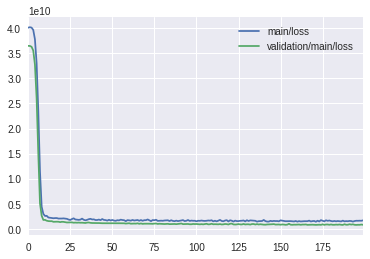

In [113]:
results[["main/loss", "validation/main/loss"]].plot()

In [114]:
chainer.serializers.save_npz("models/house_price_4.npz", model)

In [115]:
test_house_df = pd.read_csv('test.csv')

In [116]:
predict_df = pre_process(test_house_df)

/usr/local/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
x = predict_df.values

In [118]:
x = x.astype('f')

In [119]:
sale_prices = []

In [120]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    for i, x_ in enumerate(x):
        x_new = x_
        x_new = x_new[np.newaxis]
        y = model.predictor(x_new)
        sale_prices.append(y.data)

In [121]:
output_df = pd.DataFrame()

In [122]:
sale_prices = np.reshape(sale_prices, 1459)

In [123]:
output_df['Id'] = test_house_df['Id']
output_df['SalePrice'] = np.array(sale_prices)

In [124]:
output_df.head()

,Id,SalePrice
0,1461,125388.171875
1,1462,149933.421875
2,1463,160615.046875
3,1464,192970.500000
4,1465,194144.546875


In [126]:
output_df.to_csv('predict_20190116_2.csv')